---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Distributions in Pandas

In [2]:
import pandas as pd
import numpy as np

In [2]:
np.random.binomial(1, 0.5)

1

In [3]:
np.random.binomial(1000, 0.5)/1000

0.511

In [4]:
# from the video: run 10k simulations to see what proportion of the time
# are there 15 or more heads in 20 tosses of a fair coin
x = np.random.binomial(20, 0.5, 10000) # x is a np.array of the results each simulation
# print(x)
print((x >= 15).mean())

0.0216


In [5]:
chance_of_tornado = 0.01/100 # 100th of percent
np.random.binomial(100000, chance_of_tornado)

13

In [6]:
# how often are there tornadoes on consecutive days?
chance_of_tornado = 0.01

number_of_days = 1000000

# simulate 
tornado_events = np.random.binomial(1, chance_of_tornado, number_of_days)
    
two_days_in_a_row = 0
for j in range(1,len(tornado_events)-1):
    if tornado_events[j]==1 and tornado_events[j-1]==1:
        two_days_in_a_row+=1

print('{} tornadoes back to back in {:,.0f} years'.format(two_days_in_a_row, number_of_days/365))


99 tornadoes back to back in 2,740 years


In [7]:
np.random.uniform(0, 1)

0.25447989595328757

In [8]:
np.random.normal(.75)


1.3144917717745401

Formula for standard deviation
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

In [9]:
distribution = np.random.normal(0.75,size=1000)

# implementation of standard deviation
np.sqrt(np.sum((distribution - np.mean(distribution))**2)/len(distribution))

0.97982941886244146

In [10]:
np.std(distribution)

0.97982941886244146

In [11]:
import scipy.stats as stats

# kurtosis measures the shape of the tails
# < 0 indicates curve is slightly more flat
# > 0 indicates curve is slightly more "peaky"
stats.kurtosis(distribution)

-0.08847568732668831

In [12]:
# as expected, skew is slight for 1000 sample from a normal dist
stats.skew(distribution)

-0.027421792727255912

In [13]:
# chi squared is left skewed
# as the degree of freedom (the 1st param) increases, the skew decreases
chi_squared_df2 = np.random.chisquare(2, size=10000)
stats.skew(chi_squared_df2)

2.107221033706845

In [14]:
chi_squared_df5 = np.random.chisquare(5, size=10000)
stats.skew(chi_squared_df5)

1.2242807149926276

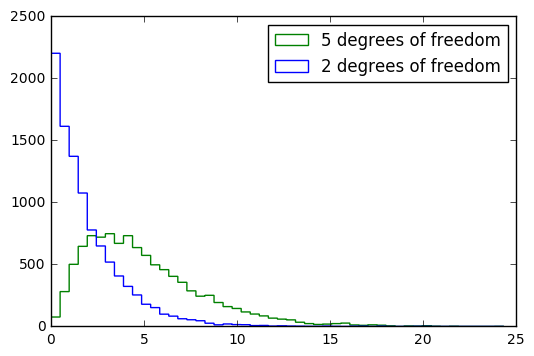

In [15]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step', 
                  label=['2 degrees of freedom','5 degrees of freedom'])
plt.legend(loc='upper right')


# Hypothesis Testing

In [3]:
df = pd.read_csv('grades.csv')

In [4]:
print(df.shape)
print(df.columns)

(2315, 13)
Index(['student_id', 'assignment1_grade', 'assignment1_submission',
       'assignment2_grade', 'assignment2_submission', 'assignment3_grade',
       'assignment3_submission', 'assignment4_grade', 'assignment4_submission',
       'assignment5_grade', 'assignment5_submission', 'assignment6_grade',
       'assignment6_submission'],
      dtype='object')


In [5]:
len(df)

2315

In [12]:
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

In [101]:
early.mean()

assignment1_grade    74.972741
assignment2_grade    67.252190
assignment3_grade    61.129050
assignment4_grade    54.157620
assignment5_grade    48.634643
assignment6_grade    43.838980
dtype: float64

In [19]:
late.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

In [1]:
from scipy import stats
stats.ttest_ind?

# different statistical tests perform better or worse with 
# different distribution types . . .
# therefore: investigate the data first, try to identify the
# distribution, and choose a test accordingly

# p-value: we choose the target, call "alpha" - the "threshold of significance"
# e.g. picking alpha=0.05 means we are expecting there will be a positive
# result 5% of the time, just due to chance

In [21]:
stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])

Ttest_indResult(statistic=1.400549944897566, pvalue=0.16148283016060577)

In [22]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

Ttest_indResult(statistic=1.3239868220912567, pvalue=0.18563824610067967)

In [23]:
stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade'])

Ttest_indResult(statistic=1.7116160037010733, pvalue=0.087101516341556676)